#### *Jo analitzaria amb els Dist, Nbh n'hi ha molts i es dificil treure conclusions representatives crec...

In [1]:
import pandas as pd
import numpy as np
from functools import reduce

In [2]:
# Importing data

immi = pd.read_csv("./immigrants-by-nationality.csv")
immi = immi[["Dist", "Nbh", "Nationality", "Number"]]
immi.columns = ['Dist', 'Nbh', 'Nationality', 'num_immi']
immi_original = immi.copy() 

mort = pd.read_excel("./mortality_rate.xlsx")
mort_original = mort.copy() 

rent = pd.read_excel("./rental_price.xlsx")
rent_original = rent.copy()

crime = pd.read_excel("./crime.xlsx")
crime_original = crime.copy()

#no
bars = pd.read_csv("../datasets/Data_filtered/bars.csv", index_col=0)
bars_original = bars.copy()

#no
children_places = pd.read_csv("../datasets/Data_filtered/Children_places.csv", index_col=0)
children_places_original = children_places.copy()

#tot 1s
cinema = pd.read_csv("../datasets/Data_filtered/cinema.csv", index_col=0)
cinema_original = cinema.copy()

#no
education = pd.read_csv("../datasets/Data_filtered/education.csv", index_col=0)
education_original = education.copy()

#no
education_kids = pd.read_csv("../datasets/Data_filtered/educationkids.csv", index_col=0)
education_kids = education_kids.copy()

#no
hospital = pd.read_csv("../datasets/Data_filtered/hospital.csv", index_col=0)
hospital = hospital.copy()

#no
library = pd.read_csv("../datasets/Data_filtered/library.csv", index_col=0)
library = library.copy()

#no
park = pd.read_csv("../datasets/Data_filtered/park.csv", index_col=0)
park = park.copy()

population = pd.read_csv("../datasets/Data_filtered/population.csv", index_col=0)
population = population.copy()

rental = pd.read_csv("../datasets/Data_filtered/rental.csv", index_col=0)
rental = rental.copy()

#no
sport = pd.read_csv("../datasets/Data_filtered/sport.csv", index_col=0)
sport = sport.copy() 

tenants = pd.read_csv("../datasets/Data_filtered/tenants.csv", index_col=0)
tenants = tenants.copy() 

In [3]:
# Grouping immigrants by Nbh and Dist, independent of country of origin

immi_nbh = immi.groupby(["Nbh","Dist"]).num_immi.sum().reset_index()
immi_nbh


,Nbh,Dist,num_immi
0,Baró de Viver,Sant Andreu,92
1,Can Baró,Horta-Guinardó,473
2,Can Peguera,Nou Barris,57
3,Canyelles,Nou Barris,140
4,Ciutat Meridiana,Nou Barris,838
...,...,...,...
69,la Vila Olímpica del Poblenou,Sant Martí,410
70,la Vila de Gràcia,Gràcia,3587
71,les Corts,Les Corts,2276
72,les Roquetes,Nou Barris,920


In [4]:
# Naming Nbh and Dist all the same

rental.columns = ['Nbh', 'rent_price']
tenants.columns = ['Nbh', 'avg_occupation']

In [5]:
# Creating list with all dataframes
# , rental missing --- hi ha moltes files jo el trauria



# Adding datasets that have only Nbh
data_frames1 = [bars, children_places, cinema, education, education_kids, hospital, library, park, sport, population, tenants]
df_merged1 = reduce(lambda left,right: pd.merge(left,right,on=["Nbh"], how='outer'), data_frames1)
df_merged1

,Nbh,Bars,Children_places,Cinemas_Theatres,Schools,Pre-Schools,Hospitals,Libraries_Theatres,Park_Gardens,Sport_Centers,Population,Net_density(hab/ha),avg_occupation
0,Horta,4.0,20.0,3.0,11.0,7.0,3.0,5.0,3.0,2.0,26715.0,422.0,2.5
1,Navas,2.0,8.0,NaN,6.0,3.0,NaN,NaN,NaN,NaN,22129.0,984.0,2.5
2,Pedralbes,1.0,14.0,NaN,8.0,41.0,NaN,10.0,9.0,1.0,12076.0,147.0,2.9
3,Sant Andreu,3.0,54.0,5.0,22.0,17.0,5.0,2.0,5.0,3.0,57183.0,746.0,2.4
4,Sant Antoni,9.0,16.0,4.0,11.0,11.0,1.0,5.0,7.0,1.0,38345.0,928.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,les Roquetes,NaN,12.0,NaN,4.0,2.0,1.0,1.0,2.0,NaN,15590.0,856.0,2.7
71,les Tres Torres,NaN,10.0,2.0,2.0,4.0,5.0,1.0,3.0,NaN,16667.0,391.0,3.0
72,la Clota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,610.0,100.0,2.3
73,la Dreta de l'Eixample,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44052.0,387.0,2.4


In [6]:
# Adding datasets that have Nbh and Dist

data_frames2 = [immi_nbh, mort, rent]
df_merged2 = reduce(lambda left,right: pd.merge(left,right,on=["Nbh", "Dist"], how='outer'), data_frames2)
df_merged2


,Nbh,Dist,num_immi,mort_rate,rent_price
0,Baró de Viver,Sant Andreu,92.0,"1.067,6",n.d.
1,Can Baró,Horta-Guinardó,473.0,"861,0",2.859
2,Can Peguera,Nou Barris,57.0,"968,0",NaN
3,Canyelles,Nou Barris,140.0,"804,9",NaN
4,Ciutat Meridiana,Nou Barris,838.0,"793,9",1.498
...,...,...,...,...,...
71,les Corts,Les Corts,2276.0,"720,4",4.821
72,les Roquetes,Nou Barris,920.0,"869,4",1.885
73,les Tres Torres,Sarrià-Sant Gervasi,702.0,"708,5",5.689
74,el Poble Sec - Parc Montjuïc,Sants-Montjuïc,NaN,"883,9",3.936


In [7]:
# Adding datasets that have Nbh and Dist (df_merged2) with dataset that has only Dist

df_merged3 = pd.merge(df_merged2, crime, how="left", on="Dist")
df_merged3

,Nbh,Dist,num_immi,mort_rate,rent_price,num_crimes
0,Baró de Viver,Sant Andreu,92.0,"1.067,6",n.d.,10.657
1,Can Baró,Horta-Guinardó,473.0,"861,0",2.859,7.871
2,Can Peguera,Nou Barris,57.0,"968,0",NaN,8.627
3,Canyelles,Nou Barris,140.0,"804,9",NaN,8.627
4,Ciutat Meridiana,Nou Barris,838.0,"793,9",1.498,8.627
...,...,...,...,...,...,...
71,les Corts,Les Corts,2276.0,"720,4",4.821,7.444
72,les Roquetes,Nou Barris,920.0,"869,4",1.885,8.627
73,les Tres Torres,Sarrià-Sant Gervasi,702.0,"708,5",5.689,9.252
74,el Poble Sec - Parc Montjuïc,Sants-Montjuïc,NaN,"883,9",3.936,20.219


In [8]:
# Merging all datasets (df_3 already contains df_1 and df_2)

df = pd.merge(df_merged1, df_merged3, how="left", on="Nbh")
df.head()

,Nbh,Bars,Children_places,Cinemas_Theatres,Schools,Pre-Schools,Hospitals,Libraries_Theatres,Park_Gardens,Sport_Centers,Population,Net_density(hab/ha),avg_occupation,Dist,num_immi,mort_rate,rent_price,num_crimes
0,Horta,4.0,20.0,3.0,11.0,7.0,3.0,5.0,3.0,2.0,26715.0,422.0,2.5,Horta-Guinardó,1127.0,"805,5",2.97,7.871
1,Navas,2.0,8.0,NaN,6.0,3.0,NaN,NaN,NaN,NaN,22129.0,984.0,2.5,Sant Andreu,988.0,"696,0",3.029,10.657
2,Pedralbes,1.0,14.0,NaN,8.0,41.0,NaN,10.0,9.0,1.0,12076.0,147.0,2.9,Les Corts,764.0,"661,6",6.34,7.444
3,Sant Andreu,3.0,54.0,5.0,22.0,17.0,5.0,2.0,5.0,3.0,57183.0,746.0,2.4,Sant Andreu,1965.0,"763,0",3.21,10.657
4,Sant Antoni,9.0,16.0,4.0,11.0,11.0,1.0,5.0,7.0,1.0,38345.0,928.0,2.3,Eixample,2490.0,"737,3",4.591,46.210


In [9]:
# Renaming columns

df.columns = ['nbh', 'bars', 'children_places', 'cinemas_theatres', 'schools',
       'pre-schools', 'hospitals', 'libraries_theatres', 'park_gardens',
       'sport_centers', 'population', 'net_density(hab/ha)', 'avg_occupation',
       'dist', 'num_immi', 'mort_rate', 'rent_price', 'num_crimes']

## Basic analysis

In [10]:
df.head()

,nbh,bars,children_places,cinemas_theatres,schools,pre-schools,hospitals,libraries_theatres,park_gardens,sport_centers,population,net_density(hab/ha),avg_occupation,dist,num_immi,mort_rate,rent_price,num_crimes
0,Horta,4.0,20.0,3.0,11.0,7.0,3.0,5.0,3.0,2.0,26715.0,422.0,2.5,Horta-Guinardó,1127.0,"805,5",2.97,7.871
1,Navas,2.0,8.0,NaN,6.0,3.0,NaN,NaN,NaN,NaN,22129.0,984.0,2.5,Sant Andreu,988.0,"696,0",3.029,10.657
2,Pedralbes,1.0,14.0,NaN,8.0,41.0,NaN,10.0,9.0,1.0,12076.0,147.0,2.9,Les Corts,764.0,"661,6",6.34,7.444
3,Sant Andreu,3.0,54.0,5.0,22.0,17.0,5.0,2.0,5.0,3.0,57183.0,746.0,2.4,Sant Andreu,1965.0,"763,0",3.21,10.657
4,Sant Antoni,9.0,16.0,4.0,11.0,11.0,1.0,5.0,7.0,1.0,38345.0,928.0,2.3,Eixample,2490.0,"737,3",4.591,46.210


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nbh                  75 non-null     object 
 1   bars                 30 non-null     float64
 2   children_places      72 non-null     float64
 3   cinemas_theatres     39 non-null     float64
 4   schools              71 non-null     float64
 5   pre-schools          71 non-null     float64
 6   hospitals            53 non-null     float64
 7   libraries_theatres   55 non-null     float64
 8   park_gardens         63 non-null     float64
 9   sport_centers        48 non-null     float64
 10  population           73 non-null     float64
 11  net_density(hab/ha)  73 non-null     float64
 12  avg_occupation       73 non-null     float64
 13  dist                 73 non-null     object 
 14  num_immi             73 non-null     float64
 15  mort_rate            71 non-null     objec

In [12]:
df.describe()

,bars,children_places,cinemas_theatres,schools,pre-schools,hospitals,libraries_theatres,park_gardens,sport_centers,population,net_density(hab/ha),avg_occupation,num_immi
count,30.000000,72.000000,39.000000,71.000000,71.000000,53.000000,55.000000,63.000000,48.000000,73.000000,73.000000,73.000000,73.000000
mean,11.966667,16.652778,4.076923,8.802817,10.352113,2.358491,4.763636,4.682540,1.812500,22202.863014,682.643836,2.519178,1333.219178
std,13.857609,13.324931,4.515381,5.866661,9.774747,1.710762,6.119077,4.234366,1.142156,14622.058303,290.236128,0.188309,1088.180582
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,610.000000,32.000000,2.200000,32.000000
25%,2.000000,8.000000,1.000000,4.000000,4.500000,1.000000,1.000000,2.000000,1.000000,10401.000000,499.000000,2.400000,603.000000
50%,5.000000,14.000000,3.000000,8.000000,8.000000,2.000000,2.000000,3.000000,1.000000,20487.000000,710.000000,2.500000,1073.000000
75%,12.750000,20.000000,4.500000,12.000000,13.000000,3.000000,5.000000,7.000000,2.000000,30584.000000,888.000000,2.500000,1791.000000
max,45.000000,77.000000,19.000000,25.000000,58.000000,8.000000,28.000000,24.000000,5.000000,58180.000000,1490.000000,3.000000,5400.000000


In [13]:
df.corr()

,bars,children_places,cinemas_theatres,schools,pre-schools,hospitals,libraries_theatres,park_gardens,sport_centers,population,net_density(hab/ha),avg_occupation,num_immi
bars,1.000000,0.073960,0.709313,0.193809,0.171637,0.057727,0.771140,0.055703,0.180134,0.259253,0.052216,-0.167796,0.708781
children_places,0.073960,1.000000,0.083063,0.316985,0.197187,0.104161,0.177943,0.194707,0.199501,0.380914,0.137235,-0.079969,0.313003
cinemas_theatres,0.709313,0.083063,1.000000,0.318014,0.303047,-0.054959,0.633089,0.276051,0.321942,0.404353,0.037718,-0.151583,0.663233
schools,0.193809,0.316985,0.318014,1.000000,0.533480,0.452514,0.259619,0.528749,0.491636,0.809047,0.100823,-0.245823,0.603175
pre-schools,0.171637,0.197187,0.303047,0.533480,1.000000,0.385839,0.571432,0.545387,0.079800,0.403899,-0.065525,-0.010794,0.407366
hospitals,0.057727,0.104161,-0.054959,0.452514,0.385839,1.000000,0.037207,0.262427,0.202860,0.306432,-0.385390,0.070037,0.166799
libraries_theatres,0.771140,0.177943,0.633089,0.259619,0.571432,0.037207,1.000000,0.397716,0.003136,0.213359,-0.066193,-0.043643,0.569822
park_gardens,0.055703,0.194707,0.276051,0.528749,0.545387,0.262427,0.397716,1.000000,0.391060,0.566760,-0.037354,0.141457,0.495059
sport_centers,0.180134,0.199501,0.321942,0.491636,0.079800,0.202860,0.003136,0.391060,1.000000,0.378546,0.062624,-0.241096,0.266286
population,0.259253,0.380914,0.404353,0.809047,0.403899,0.306432,0.213359,0.566760,0.378546,1.000000,0.398740,-0.300605,0.869310


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1175f2580>,
      dtype=object)

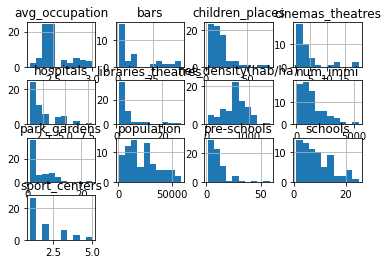

In [14]:
df.hist()

In [15]:
df.mean()

bars                      11.966667
children_places           16.652778
cinemas_theatres           4.076923
schools                    8.802817
pre-schools               10.352113
hospitals                  2.358491
libraries_theatres         4.763636
park_gardens               4.682540
sport_centers              1.812500
population             22202.863014
net_density(hab/ha)      682.643836
avg_occupation             2.519178
num_immi                1333.219178
dtype: float64

### Adding new columns

In [16]:
# Facilities per 10,000 (?) habitants

df["children_places_pop"] = df["children_places"]/df["population"]*1000
df["cinemas_theatres_pop"] = df["cinemas_theatres"]/df["population"]*1000
df["schools_pop"] = df["schools"]/df["population"]*1000
df["pre-schools_pop"] = df["pre-schools"]/df["population"]*1000
df["hospitals_pop"] = df["hospitals"]/df["population"]*1000
df["libraries_theatres_pop"] = df["libraries_theatres"]/df["population"]*1000
df["park_gardens_pop"] = df["park_gardens"]/df["population"]*1000
df["sport_centers_pop"] = df["sport_centers"]/df["population"]*1000
df["facilities_pop"] = (df["children_places_pop"] +
                       df["cinemas_theatres_pop"]+
                       df["schools_pop"]+
                       df["hospitals_pop"]+
                       df["libraries_theatres_pop"]+
                       df["park_gardens_pop"]+
                       df["sport_centers_pop"])/8

df

,nbh,bars,children_places,cinemas_theatres,schools,pre-schools,hospitals,libraries_theatres,park_gardens,sport_centers,...,num_crimes,children_places_pop,cinemas_theatres_pop,schools_pop,pre-schools_pop,hospitals_pop,libraries_theatres_pop,park_gardens_pop,sport_centers_pop,facilities_pop
0,Horta,4.0,20.0,3.0,11.0,7.0,3.0,5.0,3.0,2.0,...,7.871,0.748643,0.112296,0.411754,0.262025,0.112296,0.187161,0.112296,0.074864,0.219914
1,Navas,2.0,8.0,NaN,6.0,3.0,NaN,NaN,NaN,NaN,...,10.657,0.361517,NaN,0.271137,0.135569,NaN,NaN,NaN,NaN,NaN
2,Pedralbes,1.0,14.0,NaN,8.0,41.0,NaN,10.0,9.0,1.0,...,7.444,1.159324,NaN,0.662471,3.395164,NaN,0.828089,0.745280,0.082809,NaN
3,Sant Andreu,3.0,54.0,5.0,22.0,17.0,5.0,2.0,5.0,3.0,...,10.657,0.944337,0.087439,0.384730,0.297291,0.087439,0.034975,0.087439,0.052463,0.209853
4,Sant Antoni,9.0,16.0,4.0,11.0,11.0,1.0,5.0,7.0,1.0,...,46.210,0.417264,0.104316,0.286869,0.286869,0.026079,0.130395,0.182553,0.026079,0.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,les Roquetes,NaN,12.0,NaN,4.0,2.0,1.0,1.0,2.0,NaN,...,8.627,0.769724,NaN,0.256575,0.128287,0.064144,0.064144,0.128287,NaN,NaN
71,les Tres Torres,NaN,10.0,2.0,2.0,4.0,5.0,1.0,3.0,NaN,...,9.252,0.599988,0.119998,0.119998,0.239995,0.299994,0.059999,0.179996,NaN,NaN
72,la Clota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,7.871,NaN,NaN,NaN,NaN,NaN,NaN,3.278689,NaN,NaN
73,la Dreta de l'Eixample,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analitzant barris per paisos

In [17]:
immi

,Dist,Nbh,Nationality,num_immi
0,Ciutat Vella,el Raval,Spain,1109
1,Ciutat Vella,el Barri Gòtic,Spain,482
2,Ciutat Vella,la Barceloneta,Spain,414
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Spain,537
4,Eixample,el Fort Pienc,Spain,663
...,...,...,...,...
11761,Sant Martí,el Besòs i el Maresme,No information,0
11762,Sant Martí,Provençals del Poblenou,No information,0
11763,Sant Martí,Sant Martí de Provençals,No information,0
11764,Sant Martí,la Verneda i la Pau,No information,0


In [18]:
# More frequent immigrant nationality by Neighbourhood
immi.groupby('Nbh', group_keys=False).apply(lambda x: x.nlargest(3, "num_immi"))


,Dist,Nbh,Nationality,num_immi
57,Sant Andreu,Baró de Viver,Spain,48
649,Sant Andreu,Baró de Viver,Peru,7
279,Sant Andreu,Baró de Viver,Colombia,6
33,Horta-Guinardó,Can Baró,Spain,228
107,Horta-Guinardó,Can Baró,Italy,27
...,...,...,...,...
493,Nou Barris,les Roquetes,Honduras,217
197,Nou Barris,les Roquetes,China,37
23,Sarrià-Sant Gervasi,les Tres Torres,Spain,363
911,Sarrià-Sant Gervasi,les Tres Torres,United States,59


In [35]:
immi_dist = immi.groupby(["Dist","Nationality"])["num_immi"].sum()
immi_dist = immi_dist.to_frame()

In [34]:
# More frequent immigrant nationality by District
immi_dist.groupby('Dist', group_keys=False).apply(lambda x: x.nlargest(5, "num_immi"))

num_immi
Dist                Nationality            
Ciutat Vella        Spain              2542
                    Italy              1275
                    Pakistan            998
                    France              596
                    Bangladesh          566
Eixample            Spain              6560
                    Italy              1568
                    China               918
                    Colombia            781
                    Venezuela           724
Gràcia              Spain              2944
                    Italy               598
                    France              277
                    Colombia            200
                    Venezuela           189
Horta-Guinardó      Spain              3255
                    Italy               413
                    Honduras            365
                    Venezuela           340
                    Colombia            320
Les Corts           Spain              1955
                    Italy               205
                    Venezuela           178
                    China               137
                    Colombia            133
No consta           Spain                 2
                    Afghanistan           0
                    Albania               0
                    Algeria               0
                    Andorra               0
Nou Barris          Spain              3013
                    Honduras           1091
                    Colombia            348
                    Peru                298
                    China               266
Sant Andreu         Spain              2713
                    Peru                280
                    Colombia            270
                    China               250
                    Honduras            234
Sant Martí          Spain              4726
                    Italy               798
                    Pakistan            629
                    China               606
                    Colombia            375
Sants-Montjuïc      Spain              4219
                    Italy               684
                    China               512
                    Colombia            431
                    Pakistan            422
Sarrià-Sant Gervasi Spain              3425
                    Italy               396
                    France              315
                    United States       263
                    Venezuela           215

In [43]:
# 3 more frequent Dist for each country of origin
immi_dist2 = immi_dist.groupby('Nationality', group_keys=False).apply(lambda x: x.nlargest(3, "num_immi"))
immi_dist2

,,num_immi
Dist,Nationality,
Ciutat Vella,Afghanistan,10
Eixample,Afghanistan,2
Horta-Guinardó,Afghanistan,2
Eixample,Albania,18
Sants-Montjuïc,Albania,18
...,...,...
Les Corts,Zambia,1
Ciutat Vella,Zambia,0
Horta-Guinardó,Zimbabwe,1


In [54]:
# Filtering countries with >100 immigrants
immi_dist2.loc[immi_dist2["num_immi"]>100]

num_immi
Dist                Nationality            
Eixample            Argentina           517
Ciutat Vella        Argentina           319
Sant Martí          Argentina           246
Nou Barris          Armenia             118
Ciutat Vella        Bangladesh          566
...                                     ...
                    United States       263
Sarrià-Sant Gervasi United States       263
Eixample            Venezuela           724
Sant Martí          Venezuela           355
Horta-Guinardó      Venezuela           340

[90 rows x 1 columns]